<a href="https://colab.research.google.com/github/openecometrics/un_datathon_2023/blob/main/basket_metrics_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -U geemap

In [ ]:
!pip install pycrs

In [ ]:
import geemap
import ee
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import geopandas as gpd

In [ ]:
from google.colab import userdata
userdata.get('EARTHENGINE_TOKEN')

In [ ]:
# Load polygon data
polygons = {"type":"FeatureCollection","features":[
    {"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-124.07834518293446,47.969370128062714],[-124.09275225056355,47.65769005067943],[-123.83519261526286,47.51708591400088],[-123.24457877616702,47.4882214377926],[-122.9490098210141,47.77240772945806],[-123.08268684731141,47.994311153655005],[-123.55314706542877,47.994311153655005],[-124.07834518293446,47.969370128062714]]]}},
    {"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-124.23870968617123,47.13634158679939],[-123.57805254581301,47.11965163334313],[-123.669062299107,46.71353797477893],[-124.20421957141853,46.67945693479116],[-124.23870968617123,47.13634158679939]]]}},
    {"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-123.58109247131506,49.417481995608924],[-123.31983498608535,48.98349255449175],[-122.6339887127427,48.98992658870232],[-122.62895308510316,49.49877130349736],[-123.6315373332137,49.52004368491608],[-123.58109247131506,49.417481995608924]]]}},
    {"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-124.42298868182819,49.82045571003852],[-123.81180327099763,49.81954094134314],[-123.76986667171789,49.56224476193789],[-124.31599136446302,49.51942882858503],[-124.42491814123767,49.69151694820951],[-124.42298868182819,49.82045571003852]]]}},
    {"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-125.52116810658971,50.23627272181358],[-125.52336748513979,49.943827211620665],[-125.04740802696911,49.938861896746296],[-124.90239848345094,50.09400466249809],[-124.93277837797962,50.31669058365233],[-125.3657969413377,50.31441929505926],[-125.52116810658971,50.23627272181358]]]}},
    {"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-125.85448655268314,49.28458446736968],[-126.02038434554545,49.25998525115671],[-126.15408270544718,49.157649878453086],[-125.9045456811015,49.07449345762679],[-125.77559071051124,49.00643346076474],[-125.62524506891076,48.96566946638245],[-125.56790800114253,48.87962129286839],[-125.41021026366082,48.854764255030155],[-125.29715554957785,48.81978378596287],[-125.13443553666283,48.70391819030108],[-124.90267773645967,48.8925205450412],[-125.85448655268314,49.28458446736968]]]}},
    {"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-124.80176592624821,48.37180351511935],[-124.64273030454387,48.29879093973981],[-124.5309065042571,48.38621006165711],[-124.5962518058437,48.418056856849944],[-124.72772866960103,48.42534267304404],[-124.80176592624821,48.37180351511935]]]}}
    ]}
gdf = gpd.GeoDataFrame.from_features(polygons)
gdf['name'] = ['Olympic National Park', 'Aberdeen Site', 'Vancouver', 'Spipiyous Area', 'Campbel River Area', 'Pacific Rim', 'Hobuk']
gdf['site_class'] = ['Reference A', 'Project Area B', 'Counterfactual', 'Project Area D', 'Project Area E', 'Reference B', 'Reference C']

gdf

,geometry,name,site_class
0,"POLYGON ((-124.07835 47.96937, -124.09275 47.6...",Olympic National Park,Reference A
1,"POLYGON ((-124.23871 47.13634, -123.57805 47.1...",Aberdeen Site,Project Area B
2,"POLYGON ((-123.58109 49.41748, -123.31983 48.9...",Vancouver,Counterfactual
3,"POLYGON ((-124.42299 49.82046, -123.81180 49.8...",Spipiyous Area,Project Area D
4,"POLYGON ((-125.52117 50.23627, -125.52337 49.9...",Campbel River Area,Project Area E
5,"POLYGON ((-125.85449 49.28458, -126.02038 49.2...",Pacific Rim,Reference B
6,"POLYGON ((-124.80177 48.37180, -124.64273 48.2...",Hobuk,Reference C


In [ ]:
from shapely.geometry import mapping

# Select only the 'Hobuk' and 'Pacific Rim' sites
selected_sites = ['Hobuk', 'Pacific Rim']
filtered_gdf = gdf[gdf['name'].isin(selected_sites)]

gdf = filtered_gdf

gdf

,geometry,name,site_class
5,"POLYGON ((-125.85449 49.28458, -126.02038 49.2...",Pacific Rim,Reference B
6,"POLYGON ((-124.80177 48.37180, -124.64273 48.2...",Hobuk,Reference C


In [ ]:
# Create a map centered on the United States with a satellite basemap
Map = geemap.Map(center=[47, -123], zoom=7, basemap='Esri.WorldImagery')

# Define the CRS for your GeoDataFrame (assuming EPSG:4326)
gdf.crs = 'EPSG:4326'

# Convert the GeoDataFrame to an Earth Engine FeatureCollection
gdf_fc = geemap.geopandas_to_ee(gdf)

# Filter the FeatureCollection based on site names ('Hobuk' and 'Pacific Rim')
selected_sites = ['Hobuk', 'Pacific Rim']
roi = gdf_fc.filter(ee.Filter.inList('name', selected_sites))

# Add the filtered FeatureCollection as a layer to the map
Map.addLayer(roi, {}, "Filtered Polygons")

# Add layer control to the map
Map.addLayerControl()

# Display the map
Map

Map(center=[47, -123], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [ ]:
world_cover = ee.ImageCollection('ESA/WorldCover/v200').first().clip(roi)

vis_world_cover = {
  'bands': ['Map'],
}

Map.addLayer(world_cover, vis_world_cover, 'Landcover')

# Display the map
Map


Map(bottom=22876.0, center=[48.748945343432936, -125.20019531250001], controls=(WidgetControl(options=['positi…

Computing ... 
Generating URL ...
Please wait ...
Data downloaded to /content/output/world_cover_stats.csv


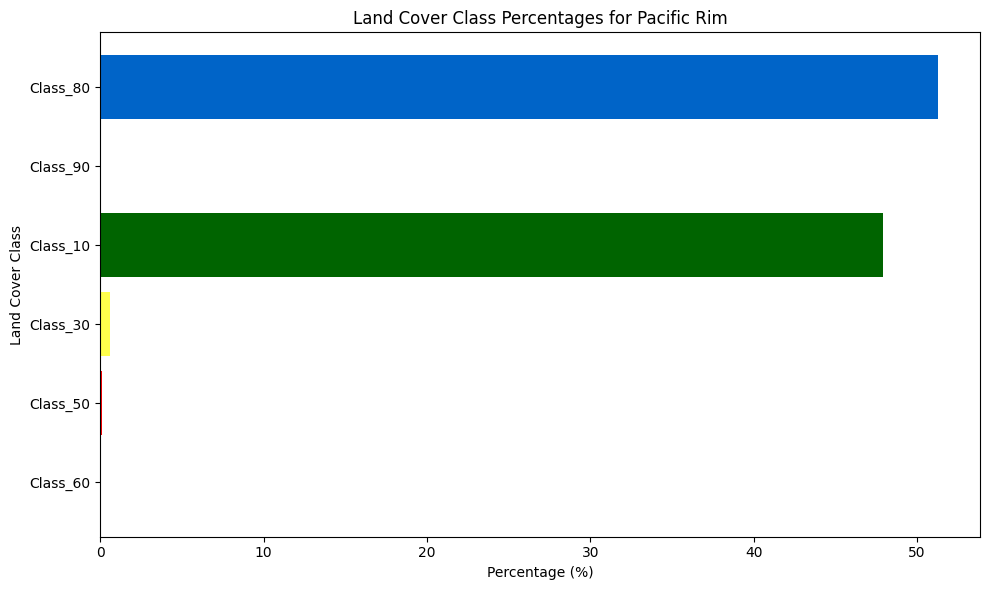

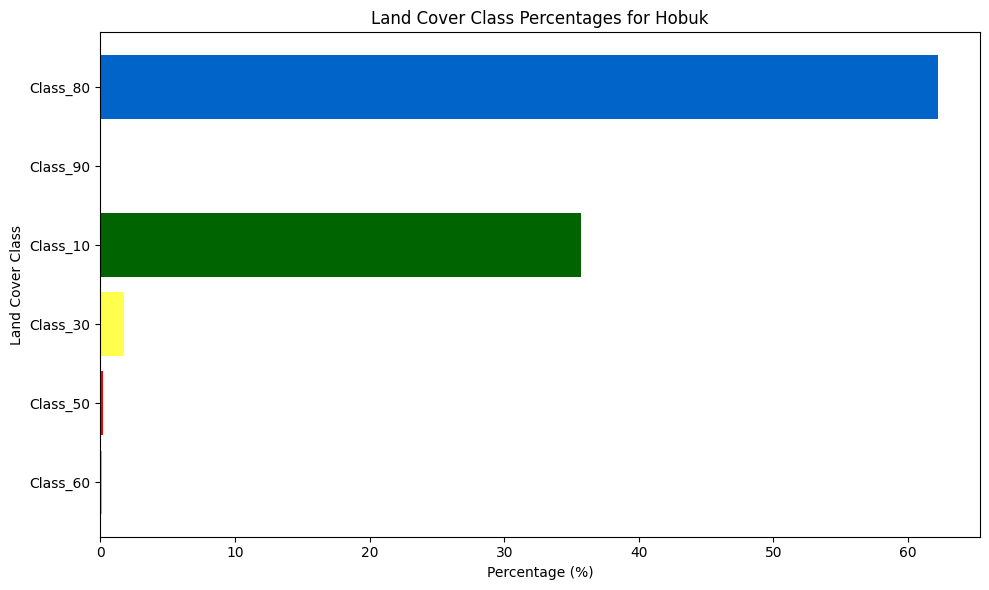

In [ ]:
land_cover_data = [
    {'code': 10, 'color': '#006400', 'description': 'Tree cover'},
    {'code': 20, 'color': '#ffbb22', 'description': 'Shrubland'},
    {'code': 30, 'color': '#ffff4c', 'description': 'Grassland'},
    {'code': 40, 'color': '#f096ff', 'description': 'Cropland'},
    {'code': 50, 'color': '#fa0000', 'description': 'Built-up'},
    {'code': 60, 'color': '#b4b4b4', 'description': 'Bare / sparse vegetation'},
    {'code': 70, 'color': '#f0f0f0', 'description': 'Snow and ice'},
    {'code': 80, 'color': '#0064c8', 'description': 'Permanent water bodies'},
    {'code': 90, 'color': '#0096a0', 'description': 'Herbaceous wetland'},
    {'code': 95, 'color': '#00cf75', 'description': 'Mangroves'},
    {'code': 100, 'color': '#fae6a0', 'description': 'Moss and lichen'}
]

# Create a dictionary that maps class descriptions (Class_#) to their colors
class_color_dict = {f'Class_{item["code"]}': item["color"] for item in land_cover_data}

# Create a dictionary that maps class numbers to descriptions
class_description_dict = {f'Class_{item["code"]}': item["description"] for item in land_cover_data}

# Define the output directory and file path
out_dir = '/content/output'
world_cover_stats = os.path.join(out_dir, 'world_cover_stats.csv')

# Perform zonal statistics for the roi
# Perform zonal statistics for the roi
geemap.zonal_statistics_by_group(
    world_cover,  # Use the filtered World Cover image: world_cover
    roi,
    world_cover_stats,
    statistics_type='SUM',
    denominator=1000000,
    decimal_places=2,
)

# Read the CSV file into a DataFrame
csv_file_path = '/content/output/world_cover_stats.csv'
df = pd.read_csv(csv_file_path)

# Get all columns except for 'name', 'site_class', and 'Class_sum'
class_types = [col for col in df.columns if col not in ['name', 'site_class', 'Class_sum', 'system:index']]

# Calculate the percentages for each class type
total_sum = df['Class_sum']

# Create a 100% stacked horizontal bar graph for each polygon site
for index, row in df.iterrows():
    site_name = row['name']
    percentages = [(row[class_type] / total_sum[index]) * 100 for class_type in class_types]
    colors = [class_color_dict[class_type] for class_type in class_types]

    # Create a horizontal bar graph for the current site with colors
    plt.figure(figsize=(10, 6))
    plt.barh(class_types, percentages, color=colors)

    plt.xlabel('Percentage (%)')
    plt.ylabel('Land Cover Class')
    plt.title(f'Land Cover Class Percentages for {site_name}')

    plt.tight_layout()
    plt.show()

In [ ]:
# Add the Hansen Forest Cover layer to the map

treeCover = ee.Image("UMD/hansen/global_forest_change_2022_v1_10").select('treecover2000').clip(roi.geometry())
lossImage = ee.Image("UMD/hansen/global_forest_change_2022_v1_10").select('loss').clip(roi.geometry())
gainImage = ee.Image("UMD/hansen/global_forest_change_2022_v1_10").select('gain').clip(roi.geometry())

# Add the tree cover layer in green.
Map.addLayer(treeCover.updateMask(treeCover),
    {'palette': ['000000', '00FF00'], 'max': 100}, 'Forest Cover')

#  Add the loss layer in red.
Map.addLayer(lossImage.updateMask(lossImage),
            {'palette': ['FF0000']}, 'Loss')

# Add the gain layer in blue.
Map.addLayer(gainImage.updateMask(gainImage),
            {'palette': ['0000FF']}, 'Gain')

# Create a custom legend
legend_dict = {
    'Forest Cover': '00FF00',  # Green
    'Loss': 'FF0000',  # Red
    'Gain': '0000FF'  # Blue
}

# Add the legend to the map
Map.add_legend(legend_dict=legend_dict, title='Hansen et al. (2013) Global Forest Change')
Map

Map(bottom=11670.0, center=[48.151428143221224, -126.26586914062501], controls=(WidgetControl(options=['positi…

In [ ]:
# Define the output directory and file path
out_dir = '/content/output'

# Define the output directory and file path for forest cover statistics
forest_cover_stats = os.path.join(out_dir, 'forest_cover_stats.csv')

# Perform zonal statistics for the forest cover within the ROI
geemap.zonal_statistics(treeCover, roi, forest_cover_stats, scale=30, statistics_type='MEAN', denominator=10000)

csv_file_path = '/content/output/forest_cover_stats.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(forest_cover_stats)

# Use the 'name' column from the gdf as the index
df.set_index(gdf['name'], inplace=True)

# Export the forest cover statistics to a CSV file
geemap.extract_values_to_points(roi, forest_cover_stats, csv_file_path)

# Read the forest cover statistics CSV file into a DataFrame
df_forest_cover = pd.read_csv(csv_file_path)

# Use the 'name' column from the gdf as the index for df_forest_cover
df_forest_cover.set_index(gdf['name'], inplace=True)

# Print the DataFrames to view the results
print(df_forest_cover)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to /content/output/forest_cover_stats.csv
The image must be an instance of ee.Image.
                            mean  system:index
name                                          
Olympic National Park  80.992472             0
Aberdeen Site          53.800887             1
Vancouver              34.952429             2
Spipiyous Area         50.253054             3
Campbel River Area     54.722433             4
Pacific Rim            41.178567             5
Hobuk                  32.315345             6


In [ ]:
# Define the output directory and file path
out_dir = '/content/output'

# Define the output directory and file path for forest loss statistics
forest_loss_stats = os.path.join(out_dir, 'forest_loss_stats.csv')

# Perform zonal statistics for the forest cover within the ROI
geemap.zonal_statistics(lossImage, roi, forest_loss_stats, scale=30, statistics_type='SUM', denominator=10000)

csv_file_path = '/content/output/forest_loss_stats.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Use the 'name' column from the gdf as the index
df.set_index(gdf['name'], inplace=True)

# Export the forest cover statistics to a CSV file
geemap.extract_values_to_points(roi, forest_loss_stats, csv_file_path)

# Read the forest cover statistics CSV file into a DataFrame
df_forest_loss = pd.read_csv(csv_file_path)

# Use the 'name' column from the gdf as the index for df_forest_cover
df_forest_loss.set_index(gdf['name'], inplace=True)

# Print the DataFrame to view the results
print(df_forest_loss)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to /content/output/forest_loss_stats.csv
The image must be an instance of ee.Image.
                                 sum  system:index
name                                              
Olympic National Park   83875.501961             0
Aberdeen Site          849265.066667             1
Vancouver              117141.807843             2
Spipiyous Area         140869.996078             3
Campbel River Area     307549.043137             4
Pacific Rim            136037.176471             5
Hobuk                   13439.980392             6


In [ ]:
# Define the output directory and file path
out_dir = '/content/output'

# Define the output directory and file path for forest loss statistics
forest_gain_stats = os.path.join(out_dir, 'forest_gain_stats.csv')

# Perform zonal statistics for the forest cover within the ROI
geemap.zonal_statistics(gainImage, roi, forest_gain_stats, scale=30, statistics_type='SUM', denominator=10000)

csv_file_path = '/content/output/forest_gain_stats.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Use the 'name' column from the gdf as the index
df.set_index(gdf['name'], inplace=True)

# Export the forest cover statistics to a CSV file
geemap.extract_values_to_points(roi, forest_gain_stats, csv_file_path)

# Read the forest cover statistics CSV file into a DataFrame
df_forest_gain = pd.read_csv(csv_file_path)

# Use the 'name' column from the gdf as the index for df_forest_cover
df_forest_gain.set_index(gdf['name'], inplace=True)

# Print the DataFrame to view the results
print(df_forest_gain)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to /content/output/forest_gain_stats.csv
The image must be an instance of ee.Image.
                                 sum  system:index
name                                              
Olympic National Park   40774.101961             0
Aberdeen Site          417931.266667             1
Vancouver               24594.729412             2
Spipiyous Area          61523.388235             3
Campbel River Area      98292.686275             4
Pacific Rim             31684.968627             5
Hobuk                    5636.819608             6
